In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [35]:
# Testing the Alogoeithm 
# Data needed to be clusterd into two clusters
X = np.array([[7,4],[1,8.8],[1,9.75],[1.5,8.4],[2.5,9],[7,3],[2,9],[2,10],[8,4],
              [2,8.4],[2.5,8.5],[1,8],[6.5,4.5],[1.5,9],[2.2,8],[8,3],[6.4,3.3],
              [7.5,3.5],[1.5,9.5],[7.5,4.5],[7,5],[6,4],[7,3.5],[6.5,3.75],[7.6,2.9]])

# Finding closest centroids

In [36]:
# find_closest_centroids returns(c(i)) an array of indexes of clusters to which
# the data point(x(i)) belonges to 
def find_closest_centroids(X, centroids):
    k = centroids.shape[0]
    idx = np.zeros(X.shape[0],dtype = int)
    for i in range(X.shape[0]):
        distance = []
        for j in range(centroids.shape[0]):
            norm_ij = np.linalg.norm(X[i] - centroids[j])
            distance.append(norm_ij)
        idx[i] = np.argmin(distance)
    return idx

# Computing centroid means 

In [37]:
#  compute_centroids returns the updated centroids 
def compute_centroids(X, idx, K):
    m, n = X.shape
    centroids = np.zeros((K, n))
    for k in range(K):
        points = X[idx == k]
        centroids[k] = np.mean(points, axis = 0)
    return centroids

# Random initialization

In [39]:
def kMeans_init_centroids(X, K):
    randidx = np.random.permutation(X.shape[0])
    centroids = X[randidx[:K]]
    return centroids

# Running k_Means

In [38]:
def run_kMeans(X, initial_centroids, max_iters):
    for i in range(max_iters):
        idx = find_closest_centroids(X, initial_centroids)
        centroids = compute_centroids(X,idx,initial_centroids.shape[0])
        
        #print(f'iteration ==== %d/%d' %(i,max_iters))
        #print()
        #print(centroids,idx,sep ='\n')
        
    return centroids,idx

In [40]:
initial_centroids = kMeans_init_centroids(X, 2)
#print(initial_centroids)
centroids,idx = run_kMeans(X, initial_centroids, max_iters=10)

In [41]:
print (centroids)
print (idx)

[[1.725      8.8625    ]
 [7.07692308 3.76538462]]
[1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1]


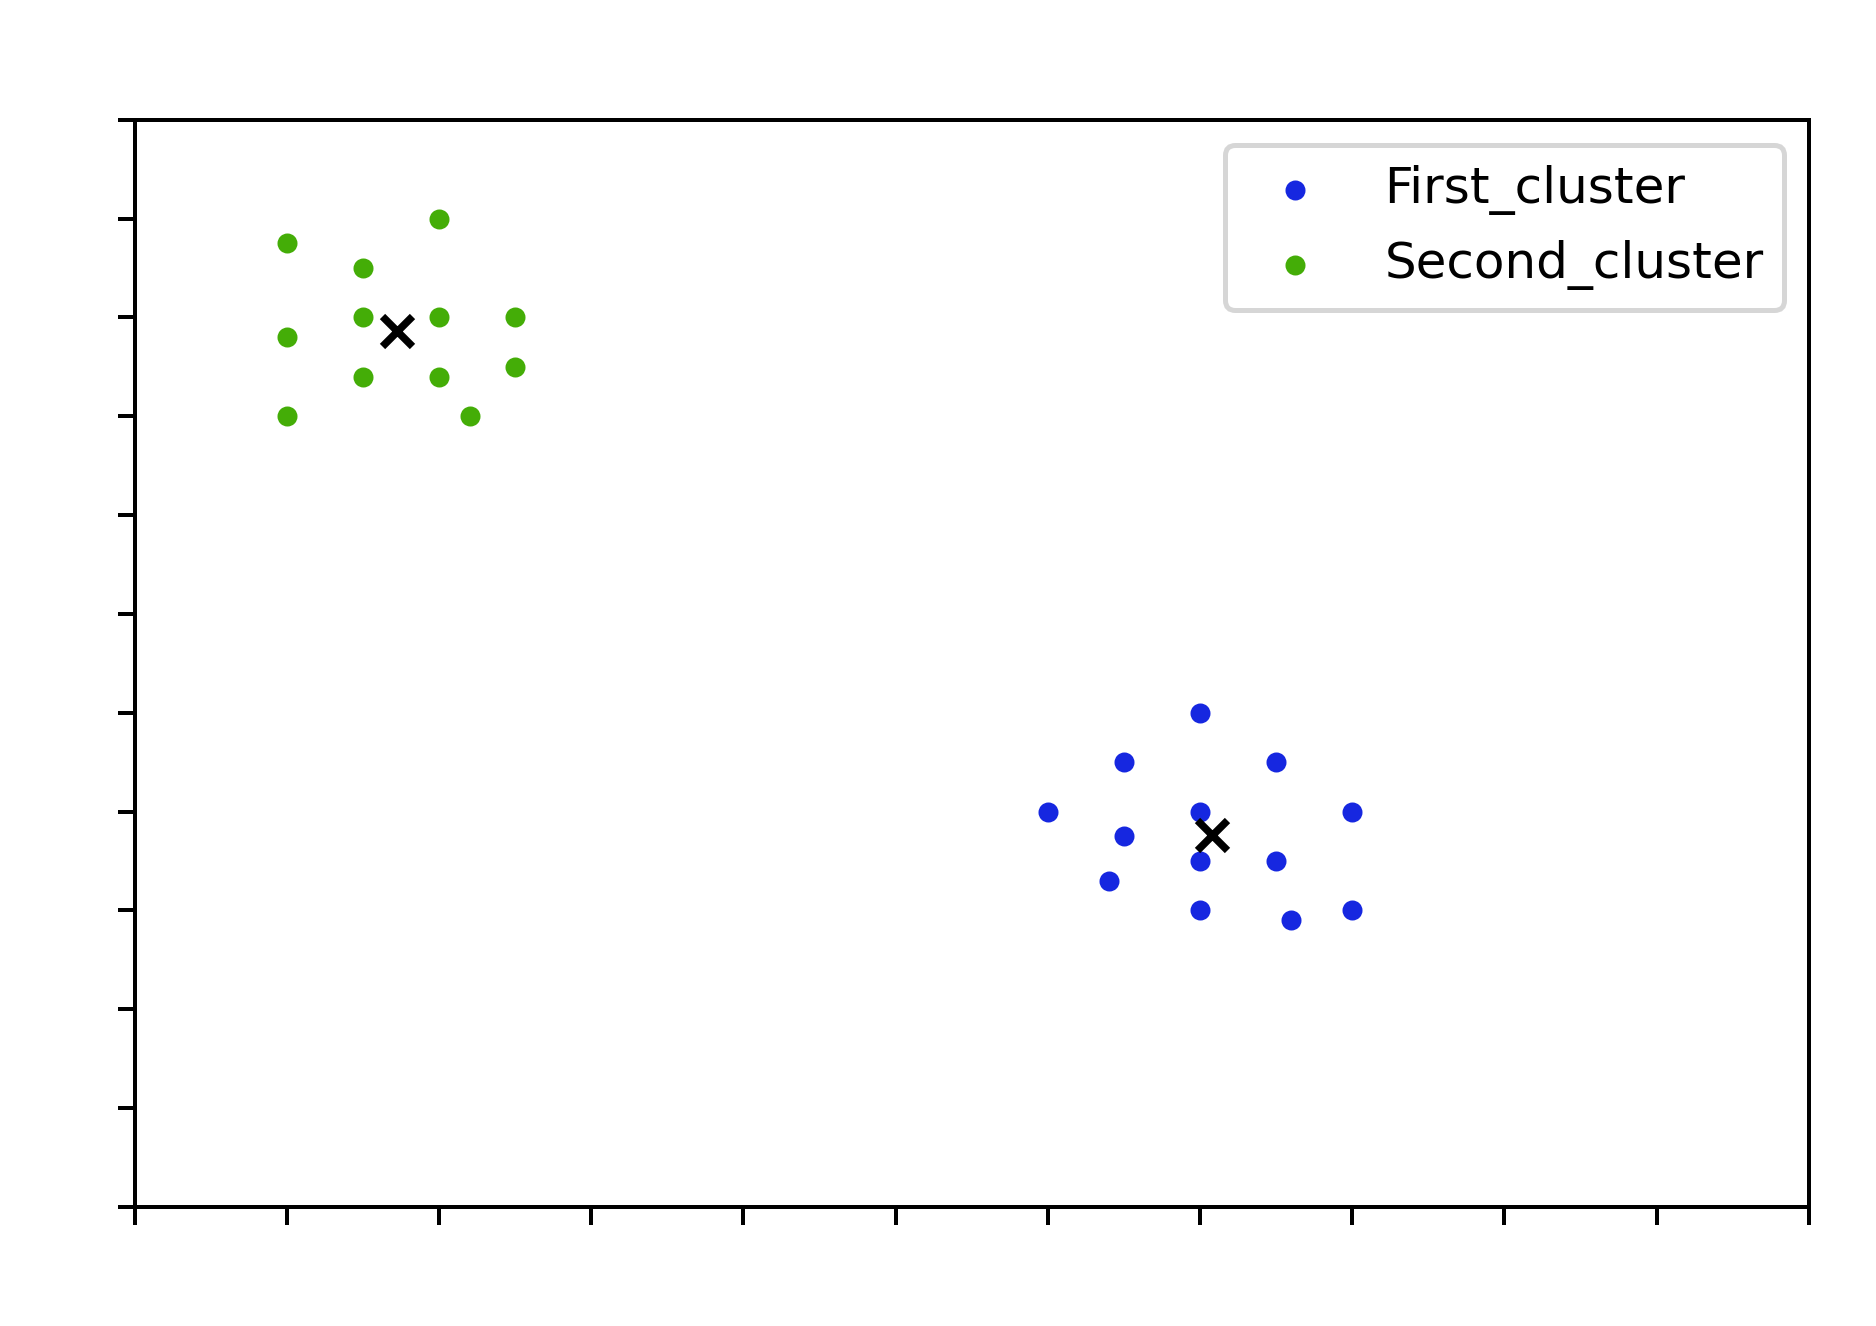

In [42]:
X_x = X[:,0]
X_y = X[:,1]

plt.figure(dpi = 360)
plt.scatter(X_x[idx == 1],X_y[idx == 1],marker='.',color = '#1627e0',label = 'First_cluster' )
plt.scatter(X_x[idx == 0],X_y[idx == 0],marker='.',color = '#44ad07',label = 'Second_cluster' )
plt.scatter(centroids[:,0],centroids[:,1],color = 'black',marker = 'x')

plt.xticks(np.arange(0,12,1),color = 'white')
plt.yticks(np.arange(0,12,1),color = 'white')

plt.title('k - means  clustering algorithm',fontdict = {'fontsize':15,'fontname':'Arial'},color = 'white')

#plt.grid(color = 'r')
plt.legend()
plt.show()

